In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data1.csv")
df['not_happened_yet_date']=pd.to_datetime(df['not_happened_yet_date'], format="%d/%m/%Y")
df['day_of_week']=df['not_happened_yet_date'].dt.dayofweek

In [3]:
display(df)

,Unnamed: 0,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,location_type,day_of_week
0,0,10371.0,4.00,CINEMA,2025-01-01,2,2
1,1,88339.0,2.40,40544,2025-01-01,9,2
2,2,18555.0,2.40,85149,2025-01-01,9,2
3,3,18555.0,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,1,2
4,4,80792.0,1.95,18555,2025-01-01,9,2
...,...,...,...,...,...,...,...
10148275,10148275,32185.0,2.65,COFFEE_SHOP,2025-12-31,1,2
10148276,10148276,32185.0,2.45,COFFEE_SHOP,2025-12-31,1,2
10148277,10148277,57569.0,14.00,WINE_BAR,2025-12-31,5,2
10148278,10148278,1490.0,9.00,57569,2025-12-31,9,2


In [4]:
df_type=list(range(9))
for n in df_type:
    df_type[n]=(df[df['location_type']==n+1]
                .drop(['Unnamed: 0','from_totally_fake_account','to_randomly_generated_account','location_type','day_of_week'],axis=1)
                .groupby(['not_happened_yet_date'])
                .agg({'sum','count'})
                .sort_values(['not_happened_yet_date'])
                .rename(columns={'monopoly_money_amount':'transaction'})
               )

In [5]:
type_dict=['food','entertainment','fashion','sports','bar','book&video','supermarket','other','person']

## Time-Sum

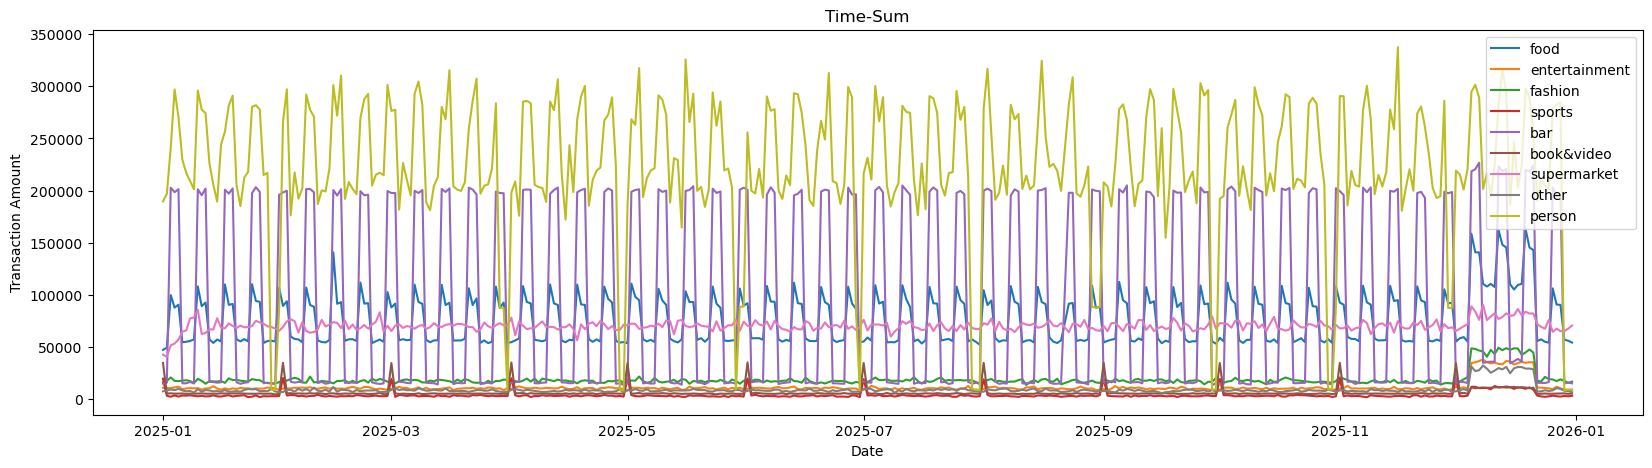

In [6]:
plt.figure(figsize=(20,5))
for n in range(9):
    plt.plot(df_type[n]['transaction']['sum'],label=type_dict[n])
plt.legend()
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Time-Sum')
plt.show()

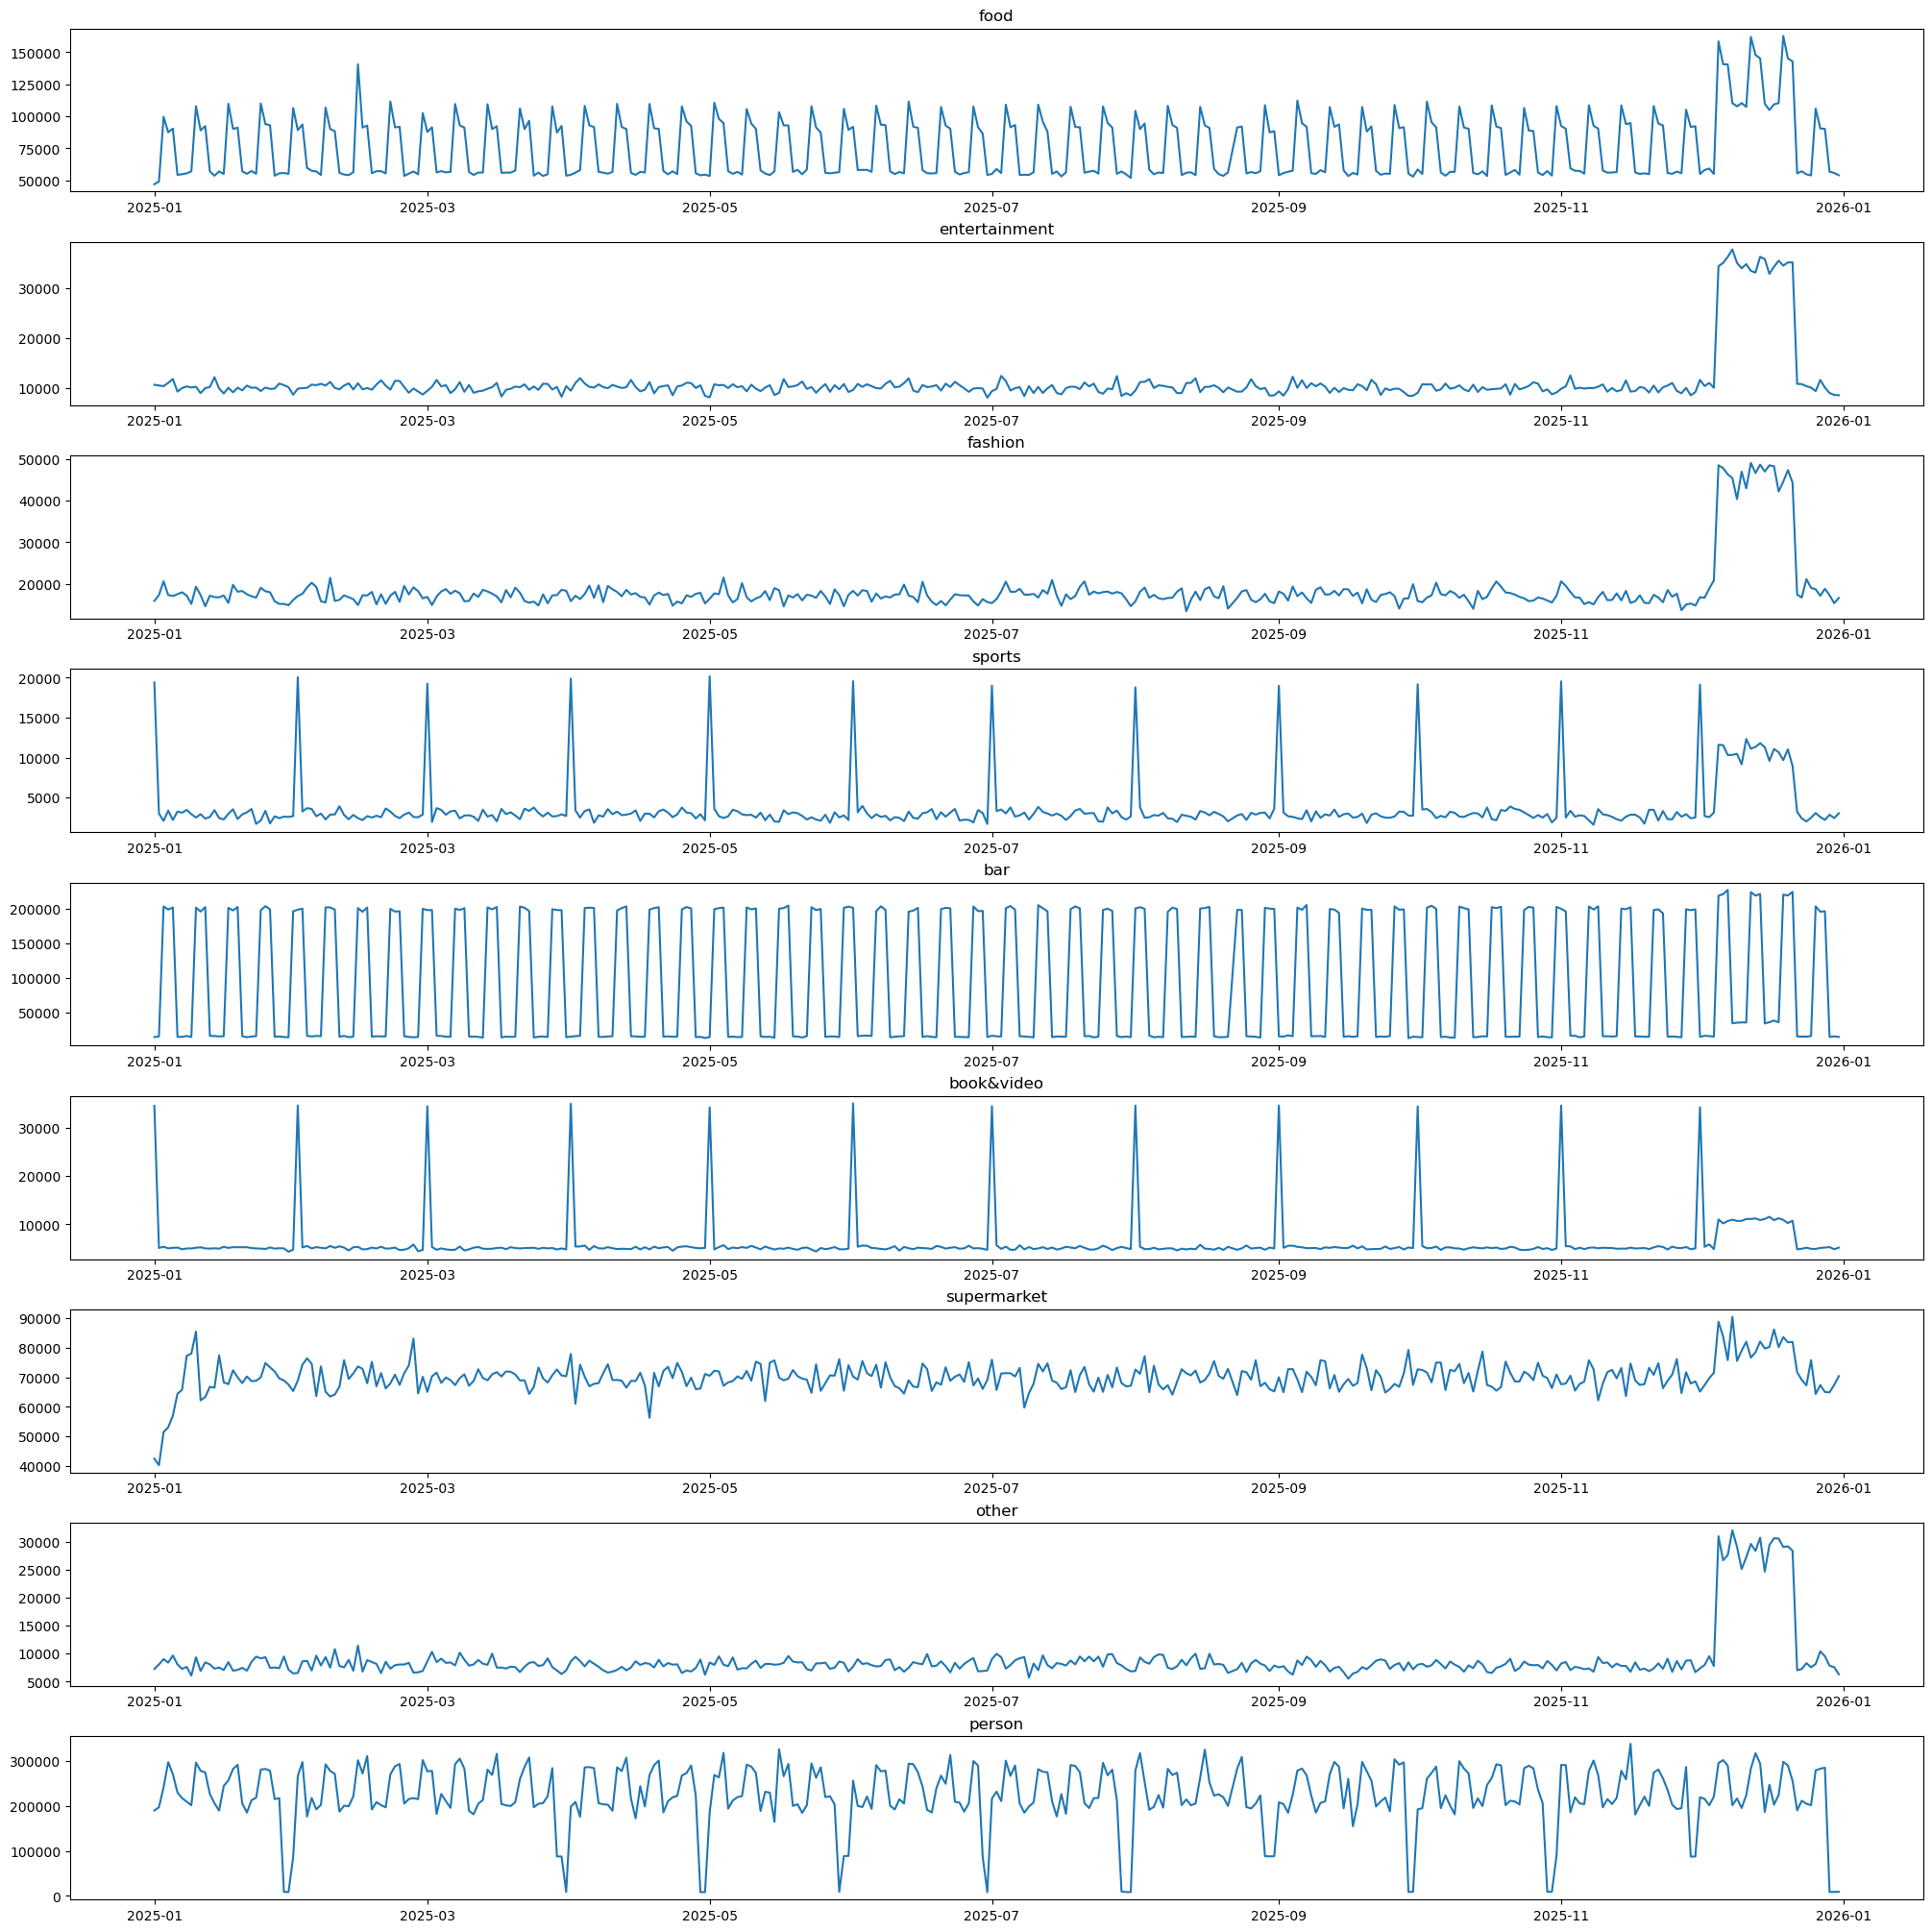

In [7]:
f,ax=plt.subplots(9,1,figsize=(20,20),constrained_layout=True)
for n in range(9):
    ax[n].plot(df_type[n]['transaction']['sum'])
    ax[n].title.set_text(type_dict[n])

## Time-Count

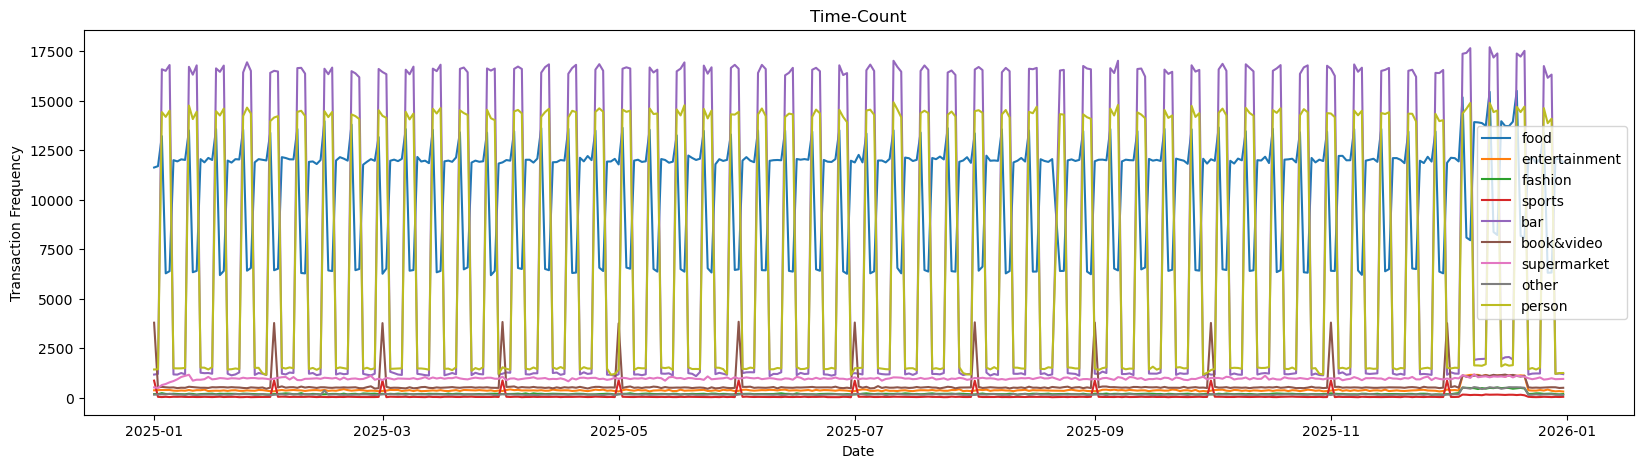

In [8]:
plt.figure(figsize=(20,5))
for n in range(9):
    plt.plot(df_type[n]['transaction']['count'],label=type_dict[n])
plt.legend()
plt.xlabel('Date')
plt.ylabel('Transaction Frequency')
plt.title('Time-Count')
plt.show()

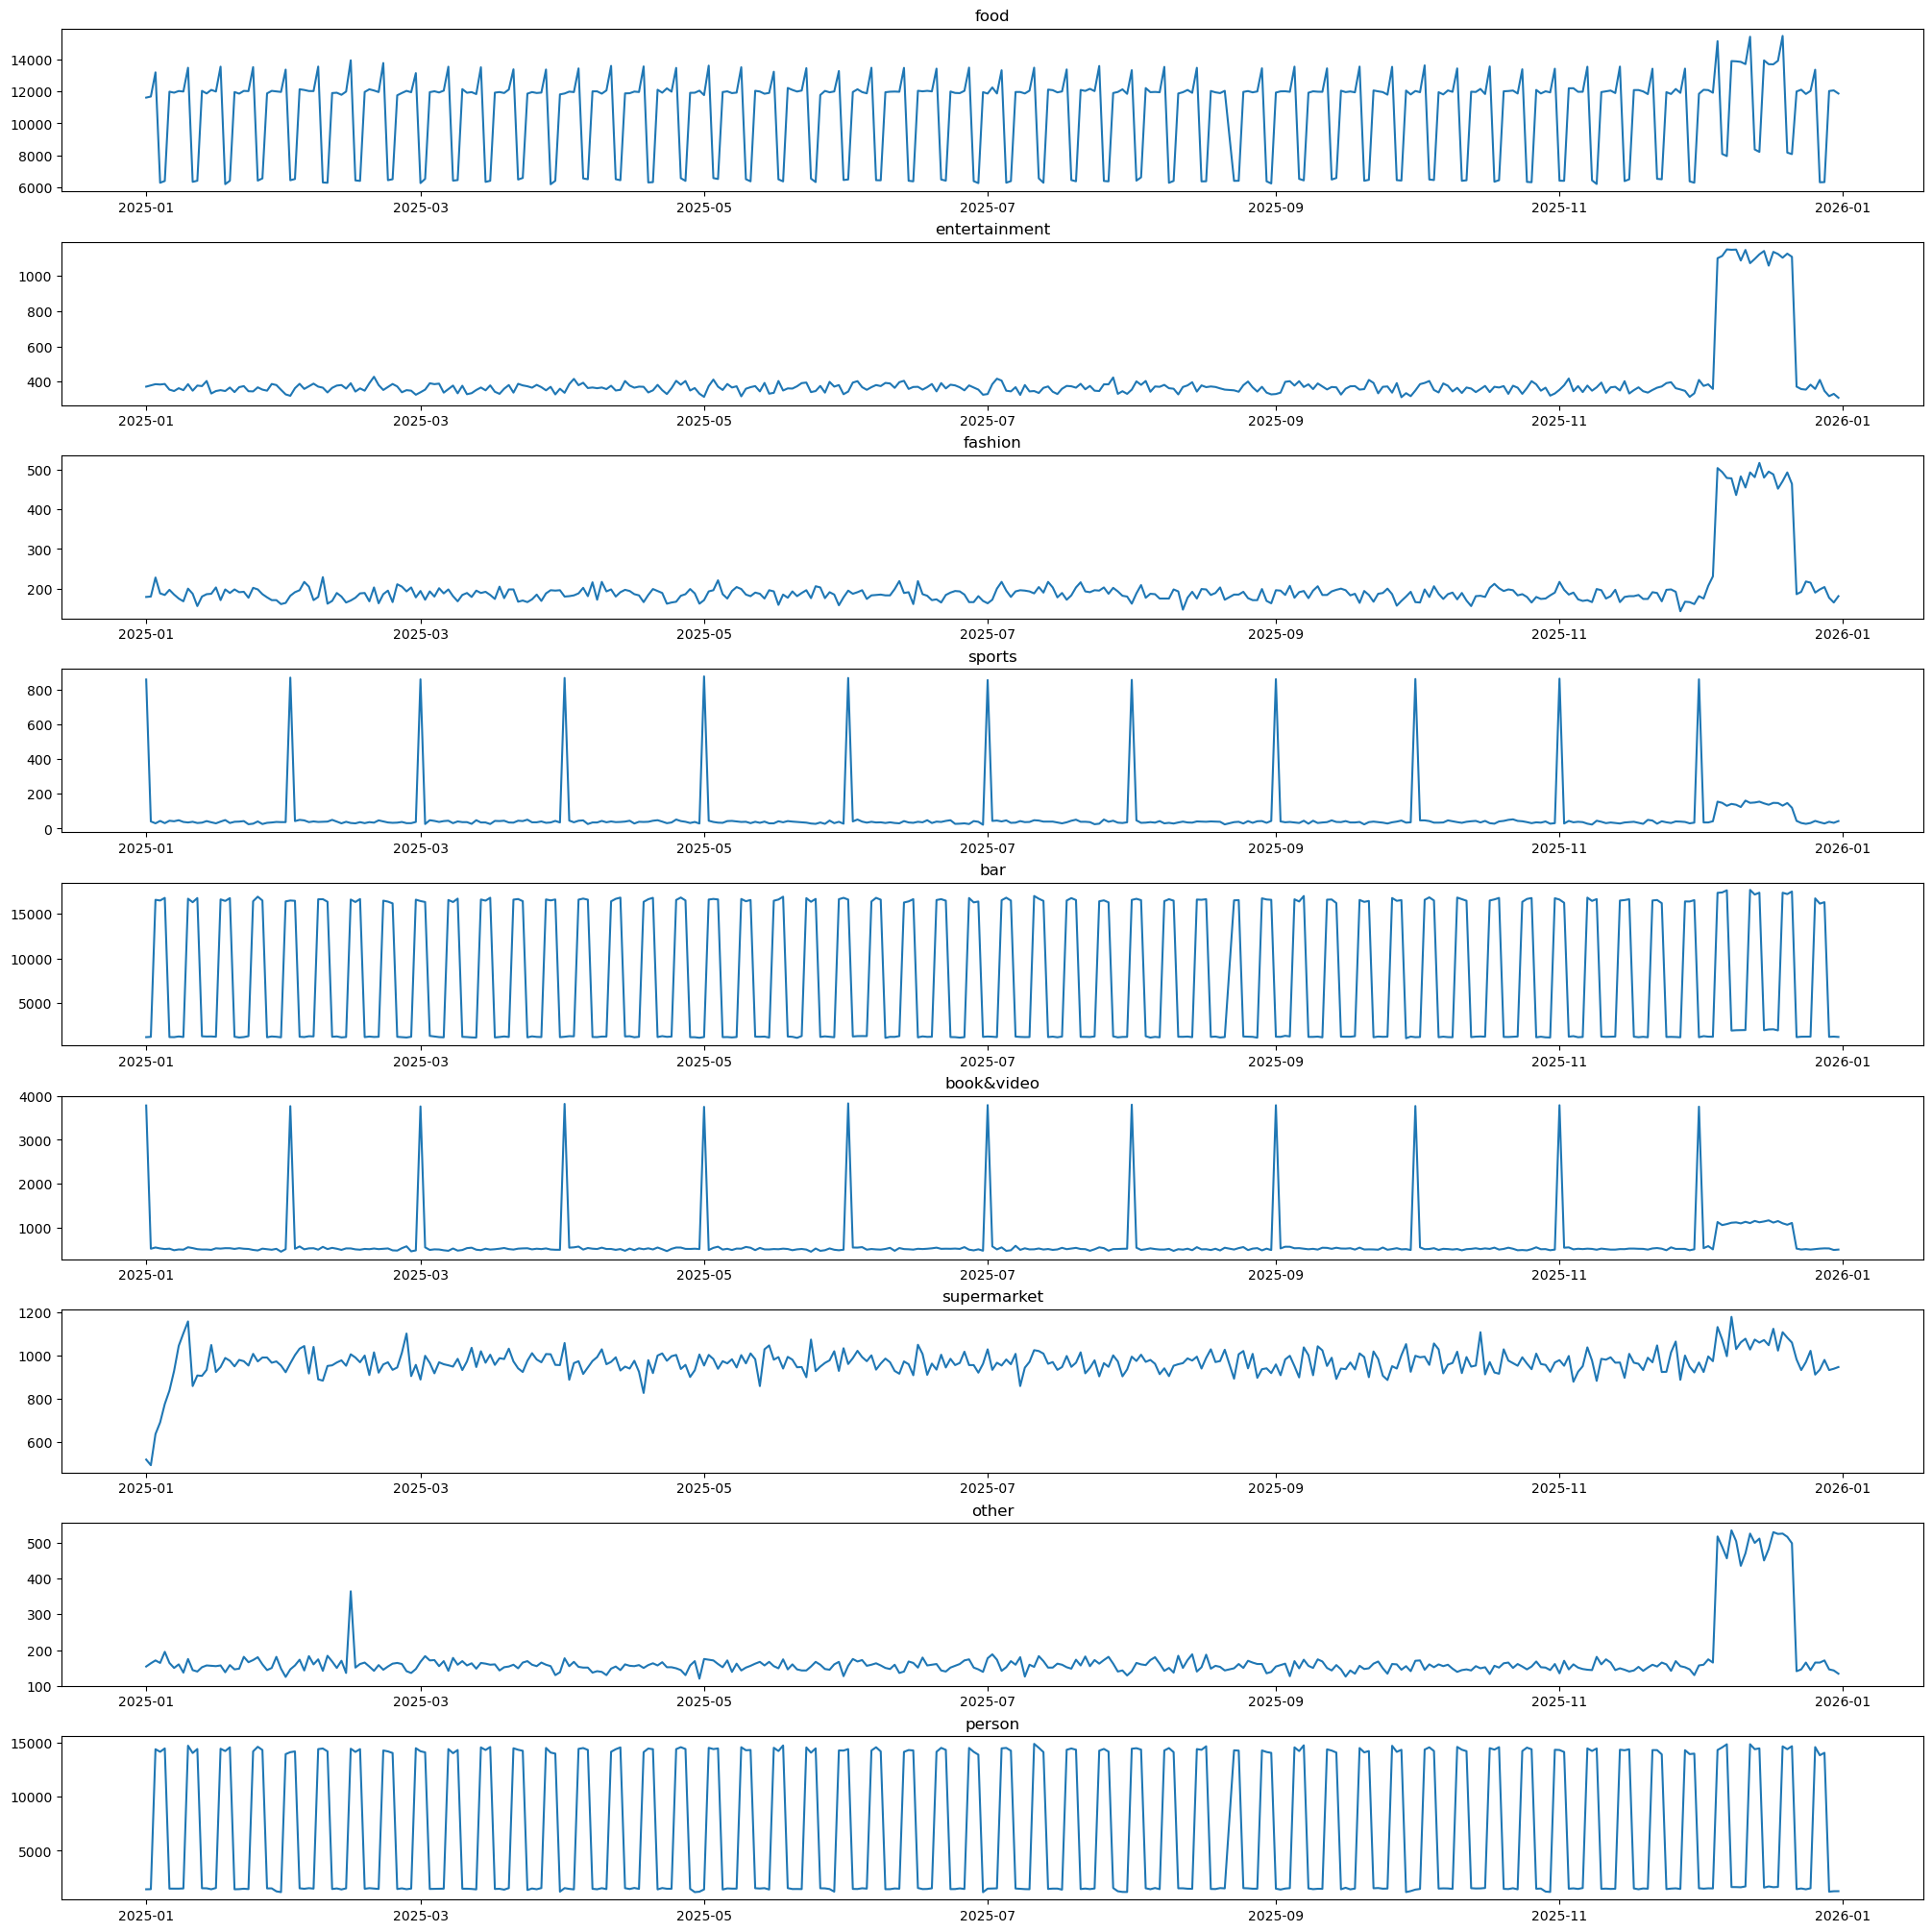

In [9]:
f,ax=plt.subplots(9,1,figsize=(20,20),constrained_layout=True)
for n in range(9):
    ax[n].plot(df_type[n]['transaction']['count'])
    ax[n].title.set_text(type_dict[n])

## 发现
* 12月（或因圣诞节）消费行为整体更加活跃
* 2月中旬有一天饮食消费金额和其他消费频率极大（考虑2月14日情人节）
* 每月初的体育用品和影像书本的消费量巨大
* 部分类别消费频率都按照一定周期有规律地波动（约四周期/月，考虑星期）
* 面向人的汇款金额在每月末骤减（为啥啊？）
* 酒吧和人频率图形状几乎完全一样（为啥啊？）
* 比大小